In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as pt
import shapefile as shp
import geopandas as gpd
import matplotlib.dates as mdates  

# Data Loading

In [3]:
crimes = pd.read_csv('crimes.csv')
crimes.head(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [4]:
crimes.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [5]:
arrests = pd.read_csv('arrests.csv')
arrests.head()

,Report ID,Report Type,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,...,Disposition Description,Address,Cross Street,LAT,LON,Location,Booking Date,Booking Time,Booking Location,Booking Location Code
0,6636966,BOOKING,07/06/2023 12:00:00 AM,2250.0,8,West LA,817,46,M,B,...,MISDEMEANOR COMPLAINT FILED,900 GAYLEY AV,NaN,34.0637,-118.4482,POINT (-118.4482 34.0637),07/07/2023 12:00:00 AM,143.0,METRO - JAIL DIVISION,4273.0
1,6637119,BOOKING,07/07/2023 12:00:00 AM,1000.0,3,Southwest,396,39,M,B,...,MISDEMEANOR COMPLAINT FILED,40TH PL,VERMONT,34.0100,-118.2915,POINT (-118.2915 34.01),07/07/2023 12:00:00 AM,1156.0,77TH ST,4212.0
2,6624479,BOOKING,06/15/2023 12:00:00 AM,1850.0,7,Wilshire,724,33,F,H,...,MISDEMEANOR COMPLAINT FILED,100 THE GROVE DR,NaN,34.0736,-118.3563,POINT (-118.3563 34.0736),06/15/2023 12:00:00 AM,2251.0,77TH ST,4212.0
3,6636128,BOOKING,07/05/2023 12:00:00 AM,1550.0,2,Rampart,218,30,F,B,...,MISDEMEANOR COMPLAINT FILED,1000 ECHO PARK AV,NaN,34.0741,-118.2590,POINT (-118.259 34.0741),07/05/2023 12:00:00 AM,1940.0,METRO - JAIL DIVISION,4273.0
4,6636650,BOOKING,07/06/2023 12:00:00 AM,1335.0,12,77th Street,1258,31,M,H,...,NaN,7800 S BROADWAY,NaN,33.9689,-118.2783,POINT (-118.2783 33.9689),07/06/2023 12:00:00 AM,1345.0,77TH ST,4212.0


In [6]:
arrests.columns

Index(['Report ID', 'Report Type', 'Arrest Date', 'Time', 'Area ID',
       'Area Name', 'Reporting District', 'Age', 'Sex Code', 'Descent Code',
       'Charge Group Code', 'Charge Group Description', 'Arrest Type Code',
       'Charge', 'Charge Description', 'Disposition Description', 'Address',
       'Cross Street', 'LAT', 'LON', 'Location', 'Booking Date',
       'Booking Time', 'Booking Location', 'Booking Location Code'],
      dtype='object')

# Data Cleaning

In [7]:
arrests['Arrest Date'] = pd.to_datetime(arrests['Arrest Date'])
arrests['Booking Date'] = pd.to_datetime(arrests['Booking Date'])
crimes['Date Rptd'] = pd.to_datetime(crimes['Date Rptd'])
crimes['DATE OCC'] = pd.to_datetime(crimes['DATE OCC'])

In [8]:
crimes.drop(['AREA','Rpt Dist No','Part 1-2','Crm Cd','Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street'],axis=1,inplace=True)
arrests.drop(['Report Type','Area ID','Charge Group Code','Address','Booking Location Code'],axis=1,inplace=True)

# Research Questions

### What is the demographic profile of the victims

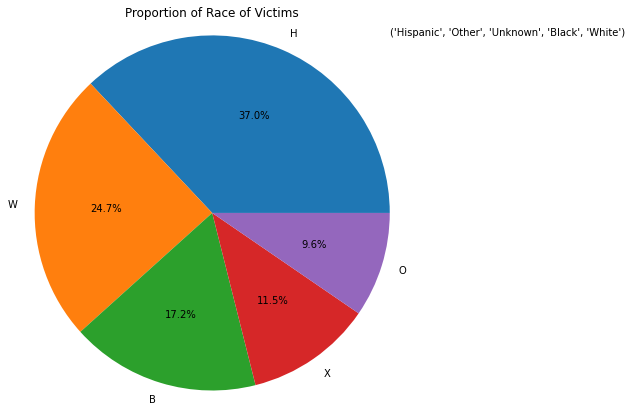

In [9]:
plt.figure(figsize=(7,7))
plt.pie(crimes['Vict Descent'].value_counts().sort_values(ascending=False).head(5)
,labels=crimes['Vict Descent'].value_counts().sort_values(ascending=False).head(5)
.index, autopct='%1.1f%%')
plt.title('Proportion of Race of Victims')
plt.text(x = 1,y=1,s = ('Hispanic','Other','Unknown','Black','White'))
plt.axis('equal')
plt.show()

In [10]:
cross = crimes[['Vict Descent','Vict Age','Vict Sex']].value_counts().reset_index()
cross = cross.loc[cross['Vict Age'] != 0]
cross.rename(columns = {0:'Value'},inplace=True)
cross.sort_values('Value',ascending=False,inplace=True)
cross.head(15)

,Vict Descent,Vict Age,Vict Sex,Value
3,H,28,F,3917
4,H,29,F,3881
5,H,30,F,3780
6,H,25,F,3706
7,H,26,F,3674
8,H,31,F,3662
9,H,27,F,3658
10,H,32,F,3577
11,H,24,F,3577
12,H,30,M,3557


Hence, the most common victims are hispanic women in their late 20's - early 30's

### How many crimes were armed vs unarmed?

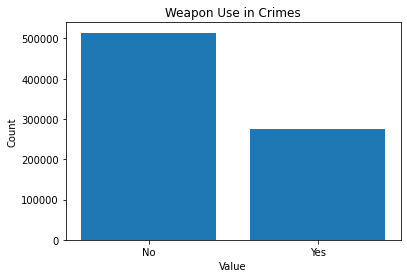

In [11]:
crimes['Weapon Desc'].fillna('None',inplace=True)
value_counts = crimes['Weapon Desc'].value_counts()

plt.bar(['No', 'Yes'], [value_counts.get('None', 0), value_counts.sum() - value_counts.get('None', 0)])
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Weapon Use in Crimes')
plt.show()

As we can see, the armed crime % is approximately an alarming 35% ($\frac{2.8}{8}$)

### Which are the most unsafe neighbourhoods?
*Screenshot taken from tableau workbook*

![LA Crime Density Map](crimes_map.png)

1. Heavy density of violent crime in the hollywood, skid row regions
2. Crime belt extends of affluent areas of Beverly Hills, Brentwood, and Westwood

Text(0.5, 1.0, 'Crime by LA Neighbourhood')

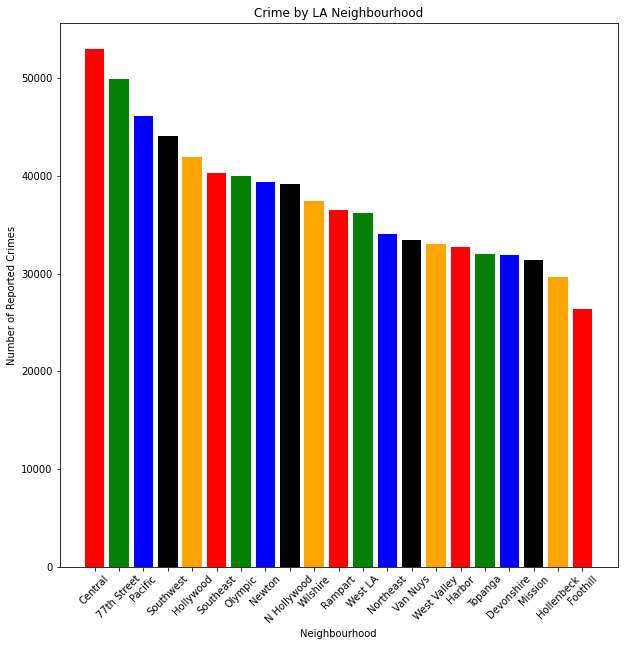

In [12]:
plt.figure(figsize=(10,10))
plt.bar(height = crimes['AREA NAME'].value_counts().values, x=crimes['AREA NAME'].value_counts().index,color =['red','green',
                                                                                                              'blue','black','orange'])
plt.xticks(rotation=45)
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Reported Crimes')
plt.title('Crime by LA Neighbourhood')

Thus, this confirms our hypothesis of the most unsafe neighbourhoods being located in the belt between Beverly Hills and Jefferson Park

### What is the trend over time of crimes committed? Are there seasonal patterns?

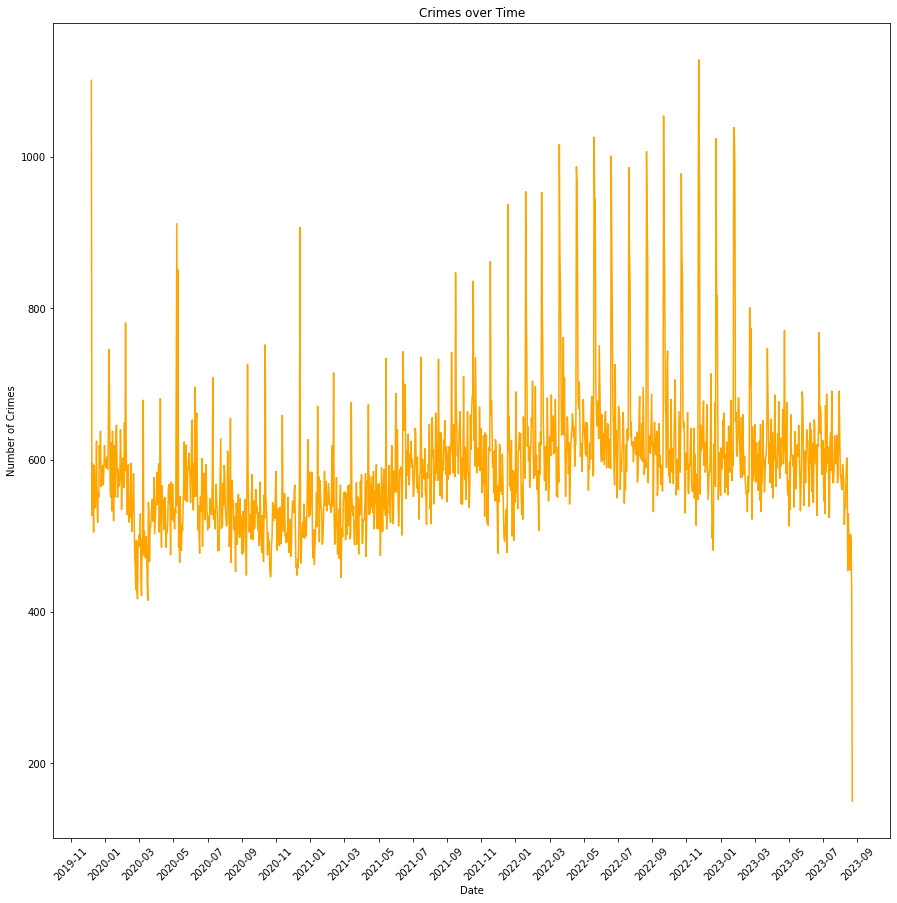

In [13]:
dates = crimes.groupby('DATE OCC').size().reset_index().rename(columns = {0:'crime_count'})
plt.figure(figsize=(15,15))
plt.plot(dates['DATE OCC'],dates['crime_count'],color='orange')
plt.title('Crimes over Time')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=60))  
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.show()

### Who is being arrested

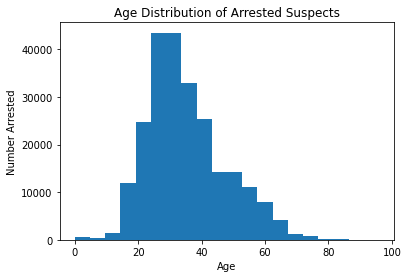

In [14]:
plt.hist(arrests['Age'],bins=20)
plt.xlabel('Age')
plt.ylabel('Number Arrested')
plt.title('Age Distribution of Arrested Suspects')


plt.plot
plt.show()

<BarContainer object of 2 artists>

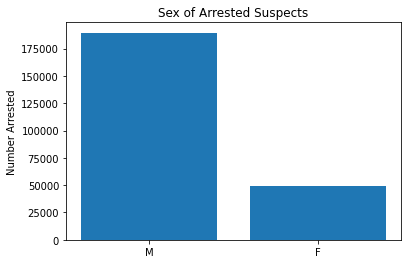

In [15]:
plt.title('Sex of Arrested Suspects')
plt.ylabel('Number Arrested')
plt.bar(arrests['Sex Code'].value_counts().index,arrests['Sex Code'].value_counts().values)

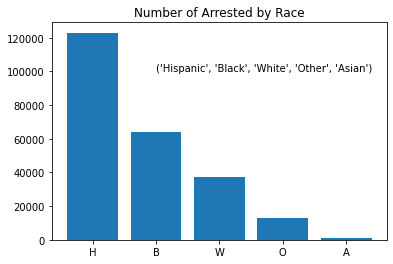

In [16]:
plt.title('Number of Arrested by Race')
plt.text(x = 1,y=100000,s = ('Hispanic','Black','White','Other','Asian'))
plt.bar(arrests['Descent Code'].value_counts().head(5).index,arrests['Descent Code'].value_counts().head(5).values)
plt.show()

#### Key Observations:
1. Interesting trend revealed, of victims and perpetrators being predominantly hispanics in Los Angeles. However, one thing to note is they constitute almost 47% of Los Angeles' population
2. A concerning trend going forward is the high number of arrests for those in their early 20's. This should be the skilled and upcoming driver of the economy. However, plagued by homelessness and drug addiction is crippling the workforce

<BarContainer object of 5 artists>

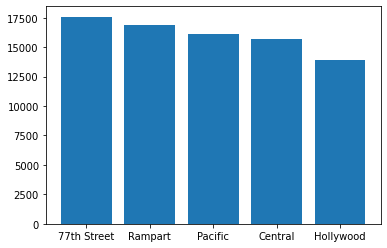

In [21]:
plt.bar(arrests['Area Name'].value_counts().head(5).index,arrests['Area Name'].value_counts().head(5).values)

Arrests are in the same locations are crimes, which would indicate little to none criminal migration to and fro scene of crime